# Bank Marketing - Subscription Prediction

*   [Introduction](#Introduction)
    *   [Marketing](#Marketing)
    *   [Term deposit](#Term-deposit)
    *   [Term deposit Prediction](#Term-deposit-Prediction)
    *   [Machine Learning Classificaion problem](#Machine-Learning-Classification-problem)
    *   [Data Set information](#Data-Set-information)
*   [Data Exploration](#Data-Exploration)
    *   [Missing Data](#Missing-Data)
    *   [Statistical Overview of available data](#Statistical-Overview-of-available-data)
    *   [Exploring unique values](#Exploring-uniqu-values)
    *   [Numerical Features](#Numerical-Features)
    *   [Categorical Features](#Categorical-Features)
*   [Feature Engineering](#Feature-Engineering)
    *   [Labeled Encoding](#Labeled-Encoding)
    *   [Correlation Analysis](#Correlation-Analysis)
    *   [Dropping non-related columns](#Dropping-non-related-columns)
    *   [Removing outliers](#Removing-outliers)
    *   [One-Hot Encoding](#One-Hot-Encoding)
    *   [Issue of Imbalance data](#Issue-of-Imbalance-data)
*   [Testing Models](#Testin-Models)
    *   [Train-Test Split](#Train-Test-Split)
    *   [Executing Models](#Executing-Models)
    *   [Top 3 Models](#Top-3-Models)
    *   [Hyperparameter Tuning](#Hyperparameter-Tuning)
*   [Finalizing the Model](#Finalizing-the-Model)
    *   [ROC Curve](#ROC-Curve)
    *   [Automatic Links](#autolink)
    *   [Important Features](#Important-Features)
    *   [Deployment of the selected model](#Deployment-of-the-selected-model)
*   [Conclusion](#Conclusion)

## Introduction
- Lets try to understand the basic terminology and what are We trying to achieve in this project.

### Marketing
The action or business of promoting and selling products or services, including market research and advertising.
### Term deposit
Term Deposits are one of the best investment options for people who are looking for a stable and safe return on their investments. In Term Deposits, the sum of money is kept for a fixed maturity and the depositor is not allowed to withdraw this sum till the end of the maturity period. That is why they are called as Term Deposits because they are kept up to a particular term.
### Term deposit Prediction
With the help of a given dataset We have to come up with such a model that should be able to predict Whether a customer will subscribe for a term deposit or not.
### Machine Learning Classification problem
The problem is a Machine learning Supervised classification problem as our goal is to *classify* the customers among 'Subscribers' and 'Non-Subscribers'

## Data Set information

The data is related with direct marketing campaigns of a Portuguese banking institution. 
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The dataset bank-additional-full.csv contains all examples (45211) with 17 features, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
### Attribute information
#### Input Variables
##### Bank Client Data
**age:** (numeric)  
**job:** type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  
**marital:** marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)  
**education:** (categorical: primary, secondary, tertiary and unknown)  
**default:** has credit in default? (categorical: 'no','yes')  
**balance:** average yearly balance, in euros (numeric)   
**housing:** has housing loan? (categorical: 'no','yes')  
**loan:** has personal loan? (categorical: 'no','yes')  
##### Related with the last contact of the current campaign:
**contact:** contact communication type (categorical: 'cellular','telephone')  
**day:** last contact day of the month (numeric)  
**month:** last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')  
**duration:** last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.
##### Other attributes:
**campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)  
**pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)  
**previous:** number of contacts performed before this campaign and for this client (numeric)  
**poutcome:** outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')  

#### Output variable (desired target):
**y:** has the client subscribed a term deposit? (binary: 'yes','no')

**Note:** It is mentioned in the Data Set information that thee are no missing values, but still we will run some test forr the same.

## Data Exploration  
Here, we will try to get some insights from our data by using both traditional data exploration and modern day data visualization techniques.  
We will be using the following libraries.
- pandas *(for data manipulation and analysis)*
- numpy *(to perform array and mathematics based operations)*
- matplotlib and seaborn *(for visualization)*

### import pandas and numpy for Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline 

df = pd.read_csv('bank/bank-full.csv')
print('Total samples: ', len(df))

Total samples:  45211


### Missing Data

In [2]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

- The sum of missing values for each columns is 0.
- Hence, There are no missing values.

### Statistical Overview of available data

- We use panadas' describe function to get a *Statistical summary* of our dataframe.
- **Note:** By default, The describe() only gives tatistical summary of numerical data.

In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
# Adding a new column by name 'subscribed' to store the value '1' if subscribed, else '0' 
df['subscribed'] = (df.y == 'yes').astype('int')
df.drop('y', axis=1, inplace=True)

#### Quick Observations on Numerical Data
- Total available data count is 45211 entries  
- Mean Age of the contacted customers is 41 years (Approx)  
- Mininmum Age of the contacted customers is 18 years
- Maximum Age of the contacted customers is 95 years
- Mean of call durationss is 258 seconds  
- Mean account balance for the customers 1362 euros  
- More than 75% of the the values in the column 'pdays' are set to -1. We know from our attribute informations that -1 means client was not previously contacted
- Just similar to the last observation more than 75% of the values inside the columns 'previous' which indicates how many times the customer was contacted before this campaign is 0 i. e. the customer is being contactedd forr the very first time.
- The values '-1' and '0' of the columns 'pdays' and 'previous' respectively are actually pointing towards the same fact.
- Because of the significant redundency of '0' and '-1' in their respective columns We might drop them later if their fluctuations do not show any relation with the outcome i. e. column 'y'.

- To get the *Statistical Summary* of the available categorical data, We need to specify the same as an argument to our describe function.

In [5]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome
count,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959


#### Quick Observation on Categorical Data
- Out of 45211, more than 44000 i. e. 97.3% customers do not have a credit. The number of customers with credit are negligible when compared to it. We might drop this column later.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         45211 non-null  int64 
 1   job         45211 non-null  object
 2   marital     45211 non-null  object
 3   education   45211 non-null  object
 4   default     45211 non-null  object
 5   balance     45211 non-null  int64 
 6   housing     45211 non-null  object
 7   loan        45211 non-null  object
 8   contact     45211 non-null  object
 9   day         45211 non-null  int64 
 10  month       45211 non-null  object
 11  duration    45211 non-null  int64 
 12  campaign    45211 non-null  int64 
 13  pdays       45211 non-null  int64 
 14  previous    45211 non-null  int64 
 15  poutcome    45211 non-null  object
 16  subscribed  45211 non-null  int32 
dtypes: int32(1), int64(7), object(9)
memory usage: 5.7+ MB


In [7]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,0
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,0
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,0
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,0


In [8]:
df.shape

(45211, 17)

In [9]:
df.groupby('subscribed').size()

subscribed
0    39922
1     5289
dtype: int64

- Let's have a look at how the data is distributed between subscribers and Non-Subscriber.

<AxesSubplot:xlabel='subscribed', ylabel='count'>

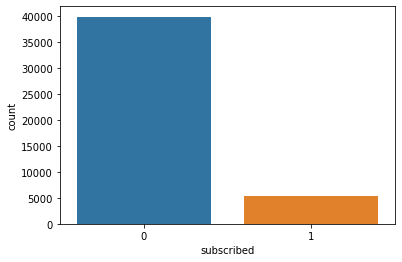

In [10]:
sns.countplot(x=df['subscribed'], data=df)

**Quick Observation** 
- 5289 Out of 45211 contacted customers subscribed

In [11]:
df.keys()

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

### Exploring unique values
- Checking if there are any unnecessary columns i.e. Columns with same type of informtion
- Finding categorical varieties

In [12]:
df[list(df.columns)[:10]].head()

,age,job,marital,education,default,balance,housing,loan,contact,day
0,58,management,married,tertiary,no,2143,yes,no,unknown,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5


In [13]:
df[list(df.columns)[10:]].head()

,month,duration,campaign,pdays,previous,poutcome,subscribed
0,may,261,1,-1,0,unknown,0
1,may,151,1,-1,0,unknown,0
2,may,76,1,-1,0,unknown,0
3,may,92,1,-1,0,unknown,0
4,may,198,1,-1,0,unknown,0


In [14]:
df.shape

(45211, 17)

In [15]:
# check unique values for every column
for feature in df.columns:
    print(f'{feature} : {df[feature].nunique()} unique values')

age : 77 unique values
job : 12 unique values
marital : 3 unique values
education : 4 unique values
default : 2 unique values
balance : 7168 unique values
housing : 2 unique values
loan : 2 unique values
contact : 3 unique values
day : 31 unique values
month : 12 unique values
duration : 1573 unique values
campaign : 48 unique values
pdays : 559 unique values
previous : 41 unique values
poutcome : 4 unique values
subscribed : 2 unique values


In [16]:
# for every column
for feature in df.columns:
    number_of_unique_values = df[feature].nunique()
    if number_of_unique_values < 15:
        print(f'{feature} : {number_of_unique_values}\n{df[feature].unique()}')

job : 12
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital : 3
['married' 'single' 'divorced']
education : 4
['tertiary' 'secondary' 'unknown' 'primary']
default : 2
['no' 'yes']
housing : 2
['yes' 'no']
loan : 2
['no' 'yes']
contact : 3
['unknown' 'cellular' 'telephone']
month : 12
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome : 4
['unknown' 'failure' 'other' 'success']
subscribed : 2
[0 1]


### Numerical Features

In [17]:
numerical_data = [data for data in df.dtypes[df.dtypes == 'int64'].index]
numerical_data

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [18]:
df[numerical_data].isnull().sum()

age         0
balance     0
day         0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64

In [19]:
df[numerical_data].head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


### Distribution of values for each numerical column.

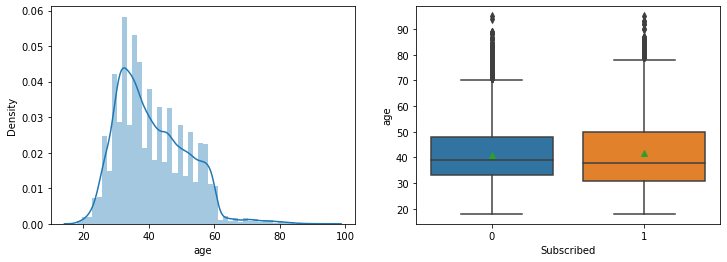

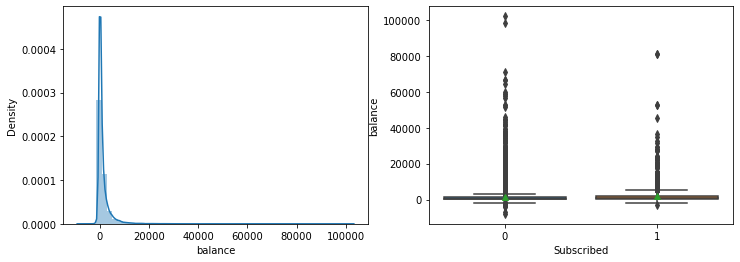

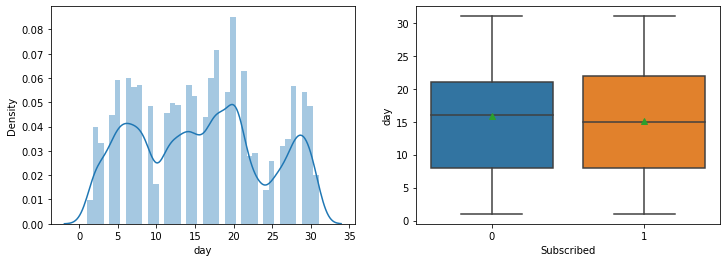

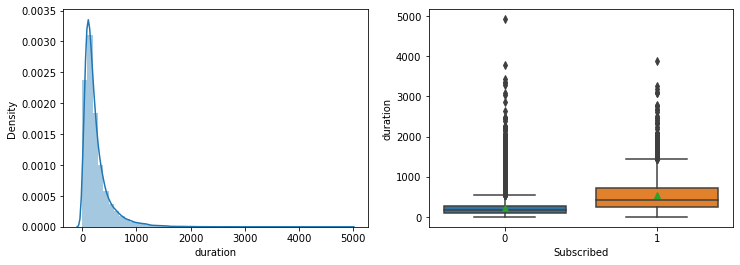

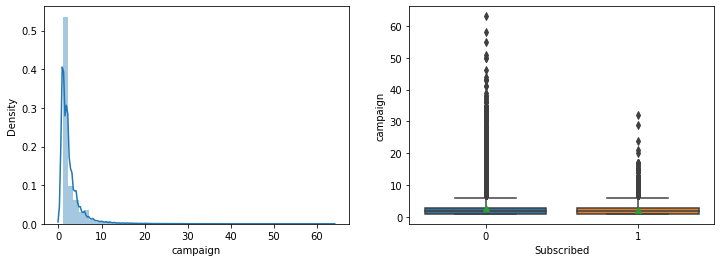

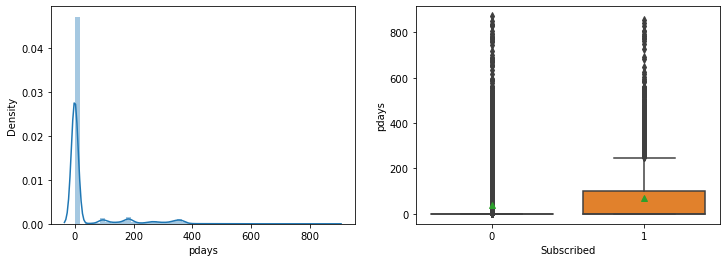

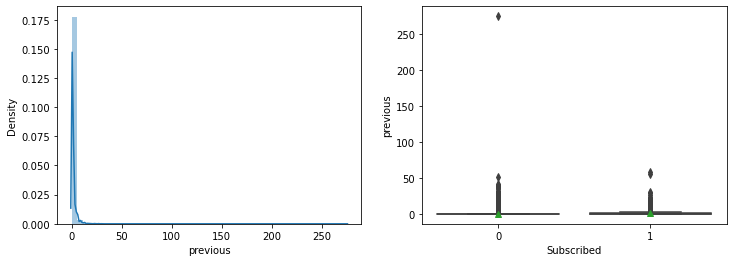

In [20]:
#creating distribution and box plots
for col in numerical_data : 
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    plt.xlabel(col)
    plt.ylabel('Density')
    
    plt.subplot(1,2,2)
    sns.boxplot(x='subscribed', y = col, data =df, showmeans = True)
    plt.xlabel('Subscribed')
    plt.ylabel(col)
    
    plt.show()

**Observations:** 
- From the Density and boxplot shown above we can say that the customerrs with longer call durations are more likely to subscribe for the term deposit
- Most of the customers who actually subscribed were contacted for the very first time
- Except for the column of age and days, all the other numerical features seems to be left skewed.

### Exploring the frequencies of Numerical features with Count plots

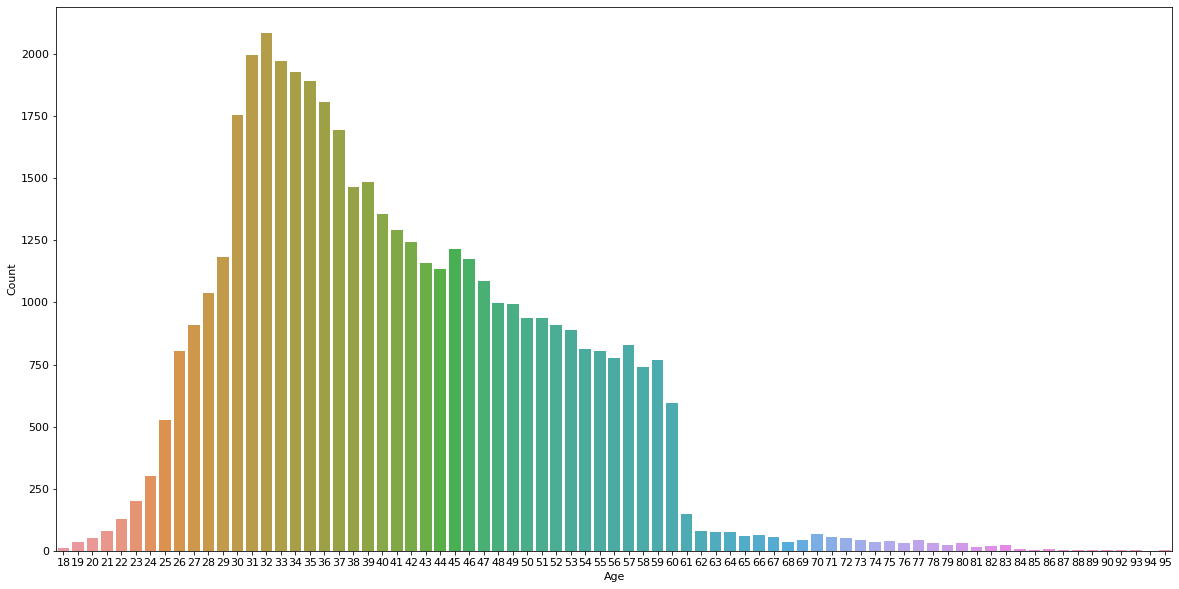

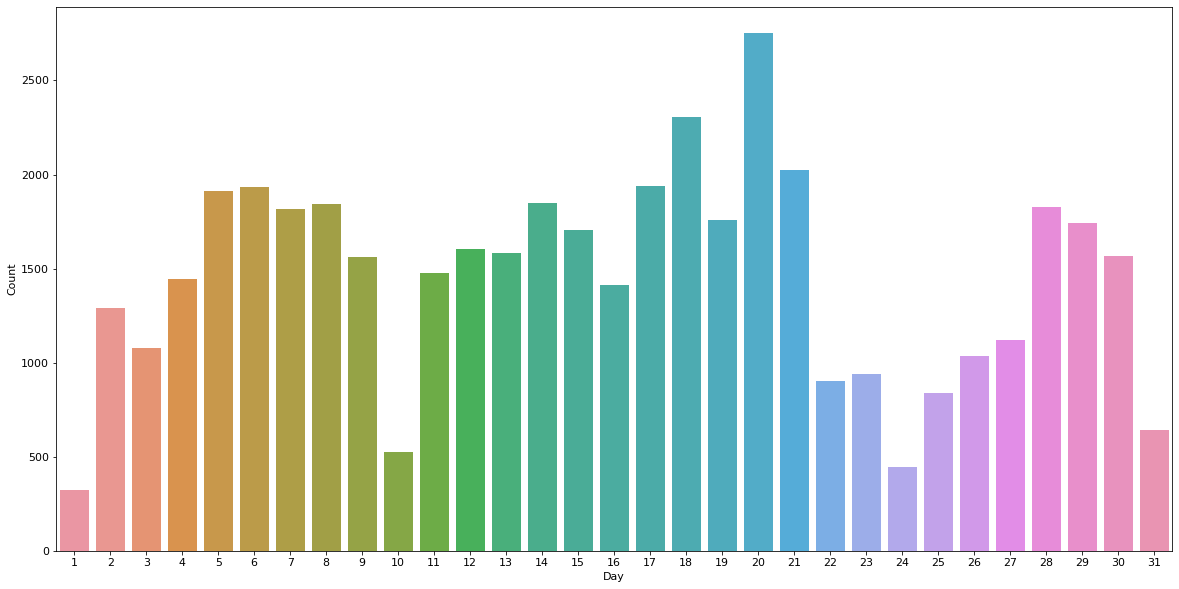

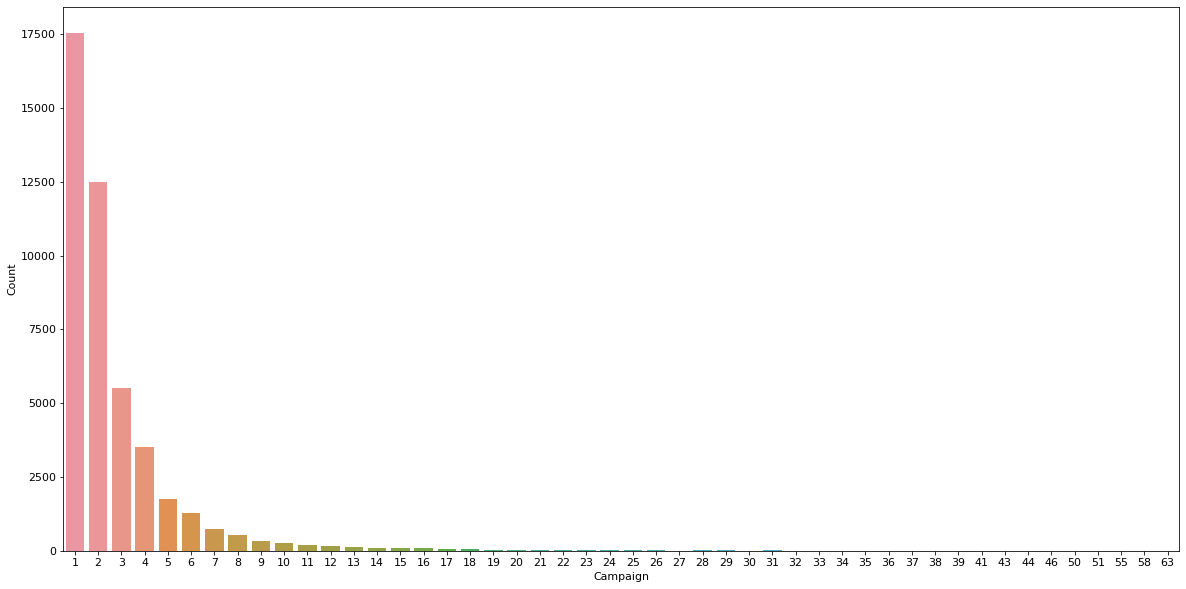

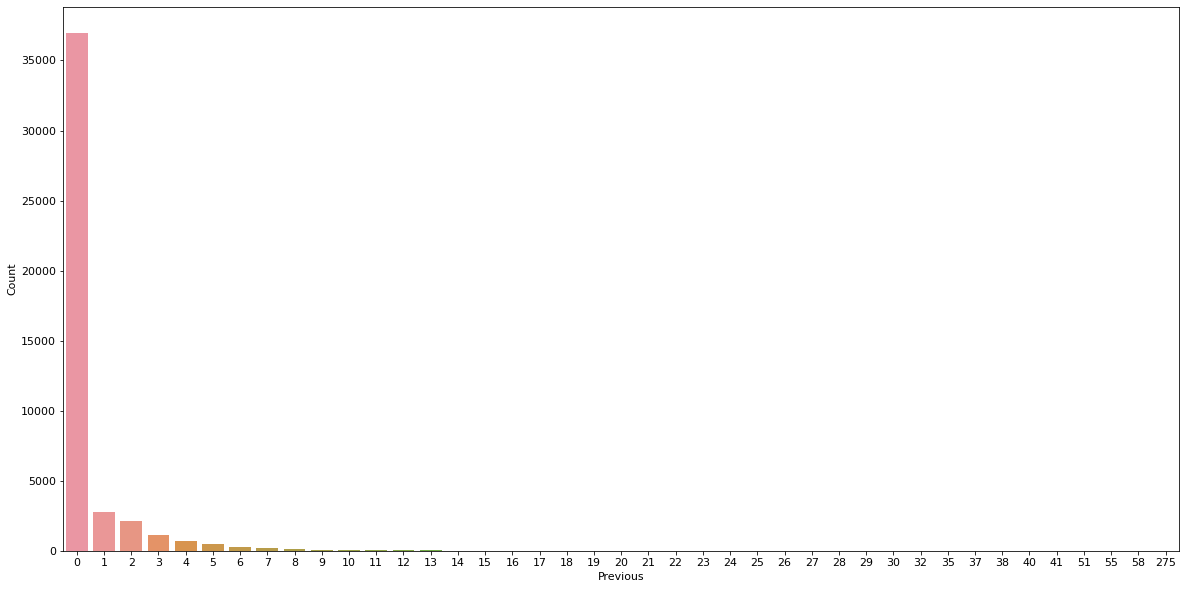

In [21]:
plt.rcParams.update({'font.size': 11})
for col in numerical_data : 
    if col not in ['balance', 'duration', 'pdays']:
        plt.figure(figsize=(20,10))
        plt.subplot().patch.set_visible(False)
        sns.countplot(x = df[col], data = df)
        plt.xlabel(col.title())
        plt.ylabel('Count')

        plt.show()

- The values for columns Balance, duration, and pdays are distributed at larger intervals hence can be visualized with histograms.

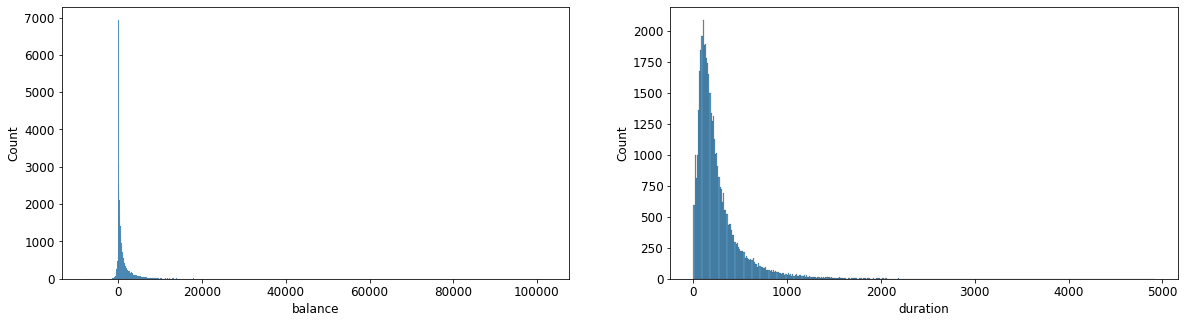

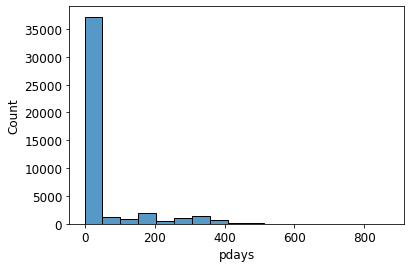

In [22]:
plt.subplots(figsize=(20,5)) 
plt.rcParams.update({'font.size': 12})
    
plt.subplot(1, 2, 1)
sns.histplot(x = df['balance'], data = df)
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(x = df['duration'], data = df)
plt.ylabel('Count')
plt.show()

plt.subplot()
sns.histplot(x = df['pdays'], data = df)
plt.ylabel('Count')

plt.show()

**Observations**
- The maximum targeted age group is 30 to 37 Years old with more than 2000 people of age 32
- More than 2500 people were contacted on 20th day of the month
- more than 17500 customers were contacted only once during the campaign

## Categorical Features

Categorical variables are non-numeric data such as job and education. To turn these non-numerical data into variables, the simplest thing is to use a technique called one-hot encoding, which will be explained below.

In [23]:
object_data = [data for data in df.dtypes[df.dtypes == 'object'].index]
object_data

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

### Graphical Representation of Categorical Features
- Using countplots to check the frequencies of values for each category

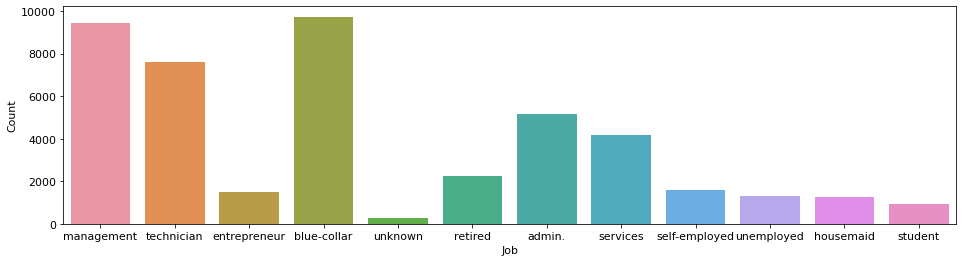

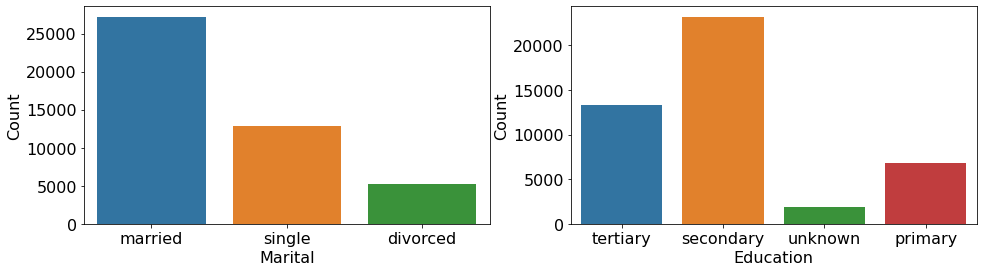

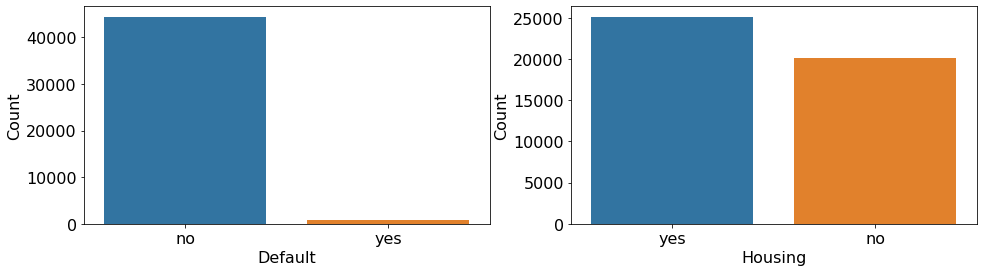

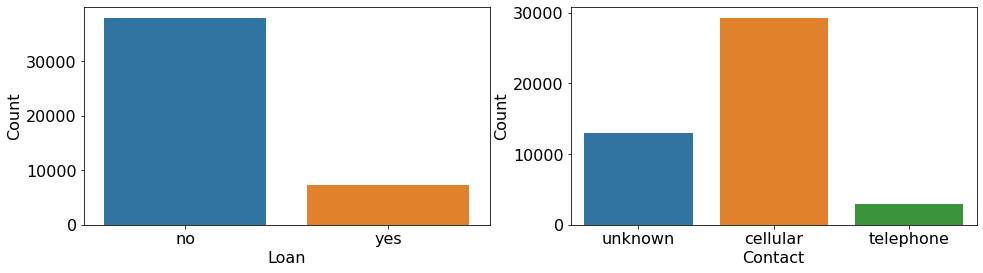

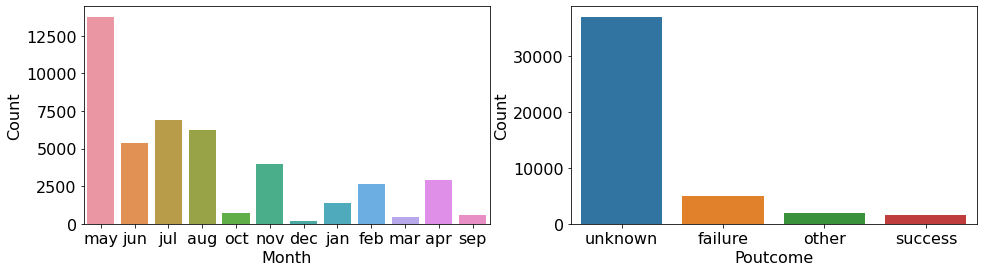

In [24]:
plt.rcParams.update({'font.size': 11})

plt.figure(figsize=(16,4))
plt.subplot().patch.set_visible(False)
sns.countplot(x = df['job'], data = df)
plt.xlabel('Job')
plt.ylabel('Count')

plt.rcParams.update({'font.size': 16})

for col in range(1, len(object_data) - 1, 2): 
    plt.figure(figsize=(16,4))
    col_index = col
    column_name = object_data[col_index]
    col_index += 1
    plt.subplot(1, 2, 1).patch.set_visible(False)
    sns.countplot(x = df[column_name], data = df)
    plt.xlabel(column_name.title())
    plt.ylabel('Count')
                 
    plt.subplot(1, 2, 2)
    column_name = object_data[col_index]
    sns.countplot(x = df[column_name], data = df)
    plt.xlabel(column_name.title())
    plt.ylabel('Count')
    
    plt.show()

- Showcasing the above data in tabular form

In [25]:
# frequency of particular value in a columns where 
for column in object_data:
    print(f'{df.groupby(column).size()}\n')

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
dtype: int64

marital
divorced     5207
married     27214
single      12790
dtype: int64

education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
dtype: int64

default
no     44396
yes      815
dtype: int64

housing
no     20081
yes    25130
dtype: int64

loan
no     37967
yes     7244
dtype: int64

contact
cellular     29285
telephone     2906
unknown      13020
dtype: int64

month
apr     2932
aug     6247
dec      214
feb     2649
jan     1403
jul     6895
jun     5341
mar      477
may    13766
nov     3970
oct      738
sep      579
dtype: int64

poutcome
failure     4901
other       1840
success     1511
unknown    36959
dtype: int64



**Observations**
- We can see the most of the targeted customers are either in management or are blue-coller (9000+ each)
- More than 25000 of the customers are married
- 20000+ customers have received secondary education
- 40000+ customers do not have any credit
- Around 25000+ have taken a housing loan
- 35000+ People do not have any kind of personal loan
- Around 30000+ people were contacted over cellular phones
- Most of the customers were contacted in the month of May
- Most of the people are being contacted for the very first time hence most of the values in the column poutcomee are unknown
- 5289 Out of 45211 contacted customers subscribed

**Let's see distribution of subscribers and non-subscribers for categorical values**

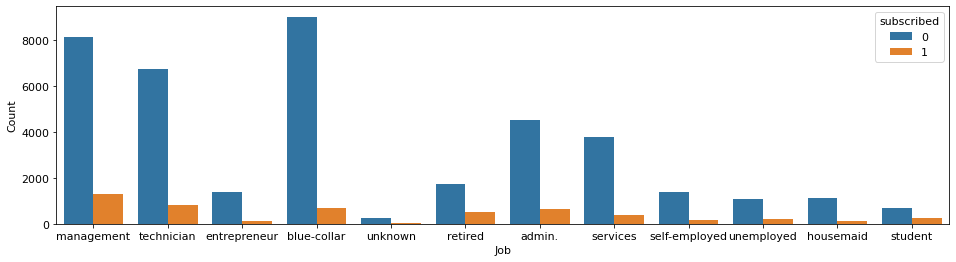

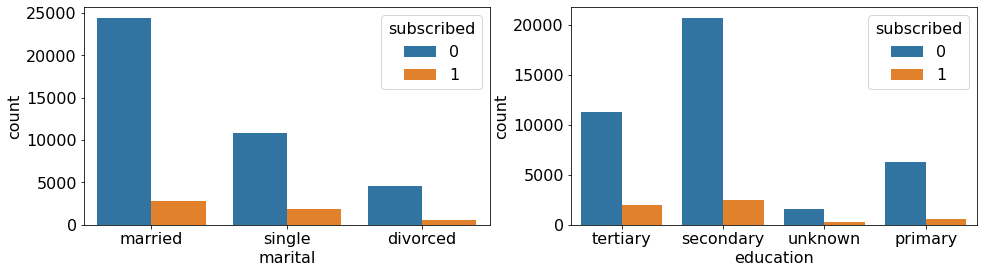

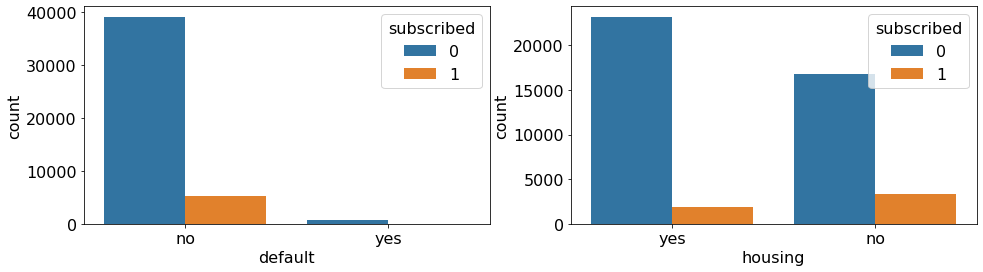

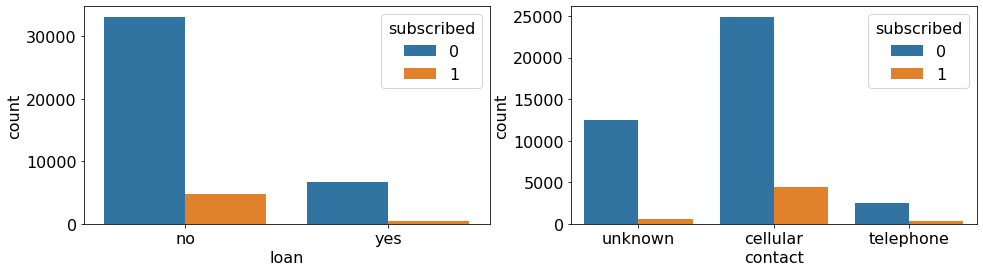

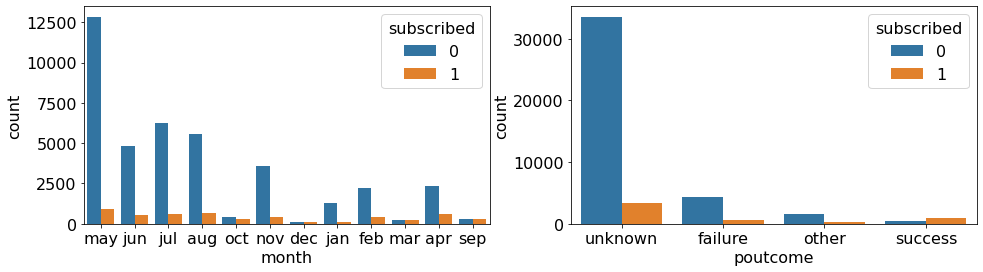

In [26]:
plt.rcParams.update({'font.size': 11})

plt.figure(figsize=(16,4))
plt.subplot().patch.set_visible(False)
sns.countplot(x = df['job'], hue='subscribed', data = df)
plt.xlabel('Job')
plt.ylabel('Count')

plt.rcParams.update({'font.size': 16})

# plt.show()

for col in range(1, len(object_data) - 1, 2): 
    plt.figure(figsize=(16,4))
    col_index = col
    column_name = object_data[col_index]
    col_index += 1
    plt.subplot(1, 2, 1).patch.set_visible(False)
    sns.countplot(x=df[column_name],hue='subscribed',data=df)
    
    column_name = object_data[col_index]
    plt.subplot(1, 2, 2).patch.set_visible(False)
    sns.countplot(x=df[column_name],hue='subscribed',data=df)
    
#     plt.show()

**Let's see the above information in tabular form.**

In [27]:
for col in object_data:
    print(df.groupby(['subscribed', col]).size())
    print()

subscribed  job          
0           admin.           4540
            blue-collar      9024
            entrepreneur     1364
            housemaid        1131
            management       8157
            retired          1748
            self-employed    1392
            services         3785
            student           669
            technician       6757
            unemployed       1101
            unknown           254
1           admin.            631
            blue-collar       708
            entrepreneur      123
            housemaid         109
            management       1301
            retired           516
            self-employed     187
            services          369
            student           269
            technician        840
            unemployed        202
            unknown            34
dtype: int64

subscribed  marital 
0           divorced     4585
            married     24459
            single      10878
1           divorced      622
   

**Obeservations**
- The customerrs in job category 'retired' have shown higher interest in the term deposit as compared to the others.
- Customers with a tertiary level of education were more like to subscribe for the term deposit.
- The people who do not have a credit have shown interest in the term deposit.
- The people who do not have a housing loan have shown relatively higher interest in the term deposit.
- Customers who were contacted during the month of March, September, December, and October repectively have mostly subscribed to the term deposit.

## Feature Engineering

Feature Engineering is classifying features such as numerial and categorical into groups in order to deeply section and analyze the data.Here, we will create features for our predictive model. For each section, we will add new variables to the dataframe and then keep track of which columns of the dataframe we want to use as part of the predictive model features. We will break down this section into numerical and categorical features.

### Labeled Encoding

We are performing the Labeled  encoding in which we will assign specific Numerical values to some caltegorical columns. We need to perform the Labeled encoding as We will need to have our feaures in Numericalbefore we try to run any Model with them or even if we want to find their correlation with other features.  
Here are the columns that We have chosen for Labeled  encoding:
- **education:** Education levels are comparable, So we can assign them the values 0, 1, 2, 3.
- **housing, loan and default:** Bivariate, We can use 0 and 1 to denote 'no' and 'yes' respectively.

In [28]:
# Replacing the values stored in 'education column' with their codes

df['education'].replace('unknown',0, inplace=True)
df['education'].replace('primary',1, inplace=True)
df['education'].replace('secondary',2, inplace=True)
df['education'].replace('tertiary',3, inplace=True)

# The column 'housing' and 'loan' are bivariate so we can replace them with 0s and 1s

for column in ['housing', 'loan', 'default']:
    df[column].replace('no',0, inplace=True)
    df[column].replace('yes',1, inplace=True)

In [29]:
# Instead of categorizing the data in 4 categories, we can label successfull poutcomes, as 1 and remaining as 0

df['poutcome'].replace(['failure', 'other', 'unknown'],0, inplace=True)
df['poutcome'].replace('success',1, inplace=True)

- In the education column we have their the new numerical values on the basis of education levels.
- 'housing', 'loan' and 'default' are still bivariate only there data type is now int64.

### Correlation Analysis
Correlation Analysis is statistical method that is used to discover if there is a relationship between two variables/datasets, and how strong that relationship may be.  

In [30]:
df.corr()

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.173615,-0.017879,0.097783,-0.185513,-0.015655,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.035526,0.025155
education,-0.173615,1.000000,-0.009035,0.050572,-0.038689,0.004307,0.021661,0.002554,0.000194,0.007092,0.025295,0.037227,0.051341
default,-0.017879,-0.009035,1.000000,-0.066745,-0.006025,0.077234,0.009424,-0.010021,0.016822,-0.029979,-0.018329,-0.023344,-0.022419
balance,0.097783,0.050572,-0.066745,1.000000,-0.068768,-0.084350,0.004503,0.021560,-0.014578,0.003435,0.016674,0.035240,0.052838
housing,-0.185513,-0.038689,-0.006025,-0.068768,1.000000,0.041323,-0.027982,0.005075,-0.023599,0.124178,0.037076,-0.091360,-0.139173
loan,-0.015655,0.004307,0.077234,-0.084350,0.041323,1.000000,0.011370,-0.012412,0.009980,-0.022754,-0.011043,-0.053713,-0.068185
day,-0.009120,0.021661,0.009424,0.004503,-0.027982,0.011370,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.030321,-0.028348
duration,-0.004648,0.002554,-0.010021,0.021560,0.005075,-0.012412,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.042389,0.394521
campaign,0.004760,0.000194,0.016822,-0.014578,-0.023599,0.009980,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.057486,-0.073172
pdays,-0.023758,0.007092,-0.029979,0.003435,0.124178,-0.022754,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.228539,0.103621


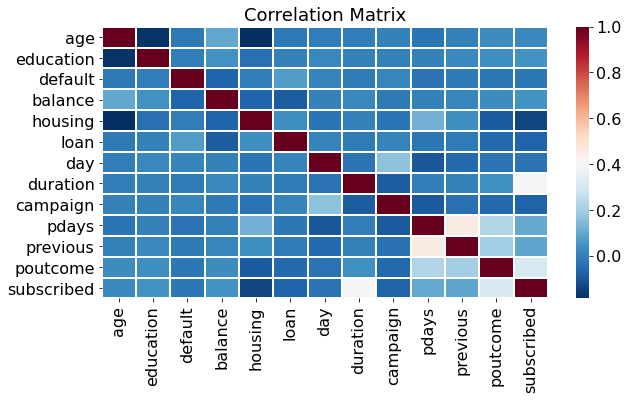

In [31]:
plt.subplots(figsize=(10,5)) 
sns.heatmap(df.corr(), cbar=True, cmap="RdBu_r", linewidths=1)
plt.title("Correlation Matrix", fontsize=18)
plt.show()

In [32]:
object_data = [data for data in df.dtypes[df.dtypes == 'object'].index]
object_data

['job', 'marital', 'contact', 'month']

In [33]:
df.dtypes

age            int64
job           object
marital       object
education      int64
default        int64
balance        int64
housing        int64
loan           int64
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome       int64
subscribed     int32
dtype: object

In [34]:
# Check for missing values
df[object_data].isnull().sum()

job        0
marital    0
contact    0
month      0
dtype: int64

In [35]:
encoded_df = df.copy()

In [36]:
encoded_col_names = []
for col in object_data:
    encoded_df[col] = df[col].astype('category')
    encoded_df[col+"_encoded"] = encoded_df[col].cat.codes
    encoded_col_names.append(col+"_encoded")
encoded_df.dtypes

age                   int64
job                category
marital            category
education             int64
default               int64
balance               int64
housing               int64
loan                  int64
contact            category
day                   int64
month              category
duration              int64
campaign              int64
pdays                 int64
previous              int64
poutcome              int64
subscribed            int32
job_encoded            int8
marital_encoded        int8
contact_encoded        int8
month_encoded          int8
dtype: object

In [37]:
encoded_df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,subscribed,job_encoded,marital_encoded,contact_encoded,month_encoded
0,58,management,married,3,0,2143,1,0,unknown,5,...,261,1,-1,0,0,0,4,1,2,8
1,44,technician,single,2,0,29,1,0,unknown,5,...,151,1,-1,0,0,0,9,2,2,8
2,33,entrepreneur,married,2,0,2,1,1,unknown,5,...,76,1,-1,0,0,0,2,1,2,8
3,47,blue-collar,married,0,0,1506,1,0,unknown,5,...,92,1,-1,0,0,0,1,1,2,8
4,33,unknown,single,0,0,1,0,0,unknown,5,...,198,1,-1,0,0,0,11,2,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,3,0,825,0,0,cellular,17,...,977,3,-1,0,0,1,9,1,0,9
45207,71,retired,divorced,1,0,1729,0,0,cellular,17,...,456,2,-1,0,0,1,5,0,0,9
45208,72,retired,married,2,0,5715,0,0,cellular,17,...,1127,5,184,3,1,1,5,1,0,9
45209,57,blue-collar,married,2,0,668,0,0,telephone,17,...,508,4,-1,0,0,0,1,1,1,9


In [38]:
encoded_df.drop(object_data, axis=1, inplace=True)
encoded_df.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'subscribed',
       'job_encoded', 'marital_encoded', 'contact_encoded', 'month_encoded'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Matrix')

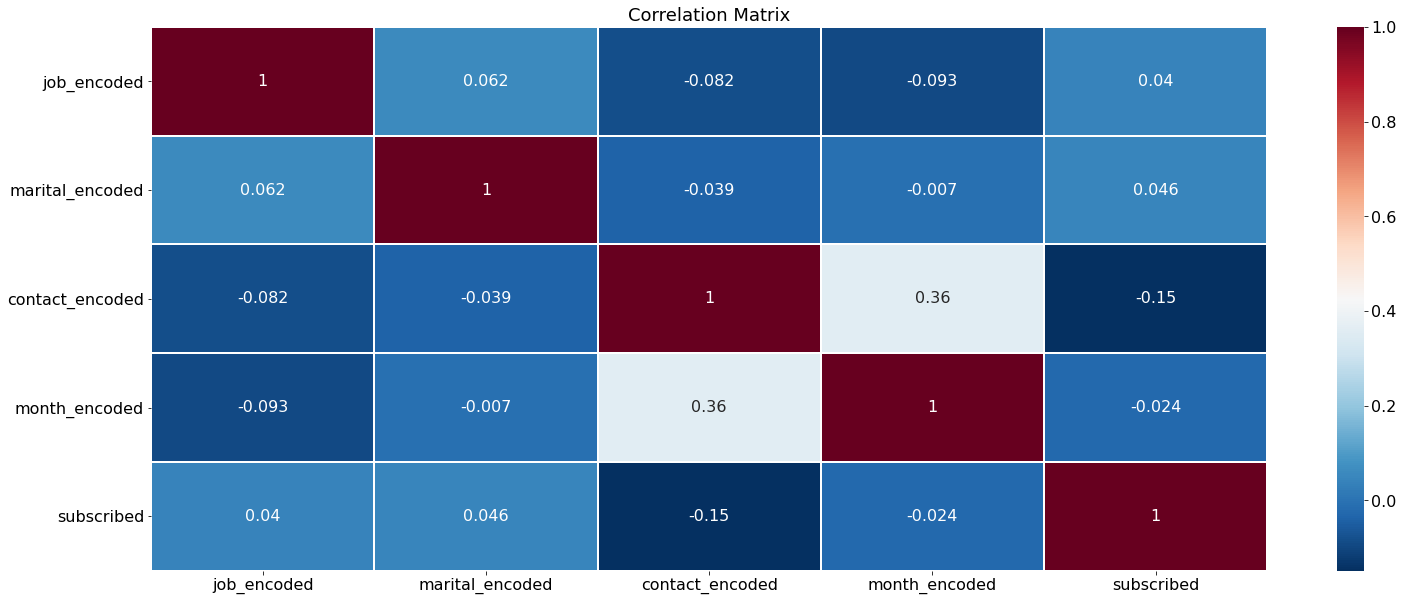

In [39]:
encoded_col_names.append('subscribed')

plt.subplots(figsize=(25,10)) 
sns.heatmap(encoded_df[encoded_col_names].corr(), cbar=True, cmap="RdBu_r",linewidths=1, annot=True)
plt.title("Correlation Matrix", fontsize=18)
# plt.show()

**Checking Non-Significant and redundant columns**
- Before deciding to drop any of the available columns We will  run a final check on the suspected columns.

In [40]:
#defaut feature does not play imp role
print(df.groupby(['default']).size())
print(df.groupby(['subscribed','default']).size())

default
0    44396
1      815
dtype: int64
subscribed  default
0           0          39159
            1            763
1           0           5237
            1             52
dtype: int64


- We are replacing the value '-1' in the column 'pdays' with 0 as -1 is the most frequent value in the column and it can affect the calculations later.

In [41]:
df['pdays'].replace(-1,0, inplace=True)

In [42]:
df.corr()

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.173615,-0.017879,0.097783,-0.185513,-0.015655,-0.009120,-0.004648,0.004760,-0.023841,0.001288,0.035526,0.025155
education,-0.173615,1.000000,-0.009035,0.050572,-0.038689,0.004307,0.021661,0.002554,0.000194,0.006975,0.025295,0.037227,0.051341
default,-0.017879,-0.009035,1.000000,-0.066745,-0.006025,0.077234,0.009424,-0.010021,0.016822,-0.029927,-0.018329,-0.023344,-0.022419
balance,0.097783,0.050572,-0.066745,1.000000,-0.068768,-0.084350,0.004503,0.021560,-0.014578,0.003330,0.016674,0.035240,0.052838
housing,-0.185513,-0.038689,-0.006025,-0.068768,1.000000,0.041323,-0.027982,0.005075,-0.023599,0.124350,0.037076,-0.091360,-0.139173
loan,-0.015655,0.004307,0.077234,-0.084350,0.041323,1.000000,0.011370,-0.012412,0.009980,-0.022709,-0.011043,-0.053713,-0.068185
day,-0.009120,0.021661,0.009424,0.004503,-0.027982,0.011370,1.000000,-0.030206,0.162490,-0.093024,-0.051710,-0.030321,-0.028348
duration,-0.004648,0.002554,-0.010021,0.021560,0.005075,-0.012412,-0.030206,1.000000,-0.084570,-0.001584,0.001203,0.042389,0.394521
campaign,0.004760,0.000194,0.016822,-0.014578,-0.023599,0.009980,0.162490,-0.084570,1.000000,-0.088508,-0.032855,-0.057486,-0.073172
pdays,-0.023841,0.006975,-0.029927,0.003330,0.124350,-0.022709,-0.093024,-0.001584,-0.088508,1.000000,0.454288,0.227786,0.103323


In [43]:
print('3 most frequent values in the column "previous":')
print(df.groupby(['previous']).size()[:3])
print()
print("Data in 'previous' column compared to 'subscribed':")
print(df.groupby(['subscribed','previous']).size())
print()
print('3 most frequent values in the column "previous":')
print(df.groupby(['pdays']).size()[:3])
print(df.groupby(['subscribed','pdays']).size())


print(f"\nRows where 'pdays' is -1 and 'subscribe' is 1: {df[(df['pdays'] == 0) & (df['subscribed'] == 1)]['subscribed'].count()}")
print(f"Rows where 'previous' is 0 and 'subscribe' is 1: {df[(df['previous'] == 0) & (df['subscribed'] == 1)]['subscribed'].count()}")

3 most frequent values in the column "previous":
previous
0    36954
1     2772
2     2106
dtype: int64

Data in 'previous' column compared to 'subscribed':
subscribed  previous
0           0           33570
            1            2189
            2            1650
            3             848
            4             543
                        ...  
1           26              1
            29              1
            30              1
            55              1
            58              1
Length: 66, dtype: int64

3 most frequent values in the column "previous":
pdays
0    36954
1       15
2       37
dtype: int64
subscribed  pdays
0           0        33570
            1            9
            2           35
            3            1
            4            1
                     ...  
1           804          1
            805          1
            828          1
            842          1
            854          1
Length: 914, dtype: int64

Rows where 'pdays' is -

In [44]:
df.shape

(45211, 17)

### Dropping non-related columns
- **default:** It has 44369 'no' values. It denotes that 44369 out of 45211 customers do not have a credit in default.
- **contact:** This column can't contribute anymore in our prediction as the standard meddium of communication is 'cellular' now.
- **month and day:** We can drop these two columns as they aren't showing any significant correlation with our target variable.
- **previous:** Most frequent value in the columns 'previous' and 'pdays' is 0. Both these values have a frequency of 36954. Also the most frequent values are pointing towards the same  fact. We can drop 'previous' as the 'pdays' column has shown a higher correlation with target variable.

In [45]:
df.drop(['default','contact', 'month', 'day', 'previous'], axis=1, inplace= True)

In [46]:
df.shape

(45211, 12)

In [47]:
print(f"Job Unknown: {df[df['job']=='unknown']['job'].count()}")
print(f"Education Unknown: {df[df['education']== 0]['education'].count()}")
print(f"Job and Education Unknown: {df[(df['job']=='unknown') & (df['education']== 0)]['education'].count()}")
print(f"Job or Education Unknown:{df[(df['job']=='unknown') | (df['education']== 0)]['education'].count()}")

Job Unknown: 288
Education Unknown: 1857
Job and Education Unknown: 127
Job or Education Unknown:2018


### Dropping rows with unknown values
- We are dropping the rows with 'unknown' as entry from the education and job column. Column 'education' has 1857, and 'job' has 288 unknown values.
- A total of 127 rows have 'unknown' entry in both the education and job column.
- Dropping these entries will removes a total of 2018 values from our dataframe.

In [48]:
df.drop(df[df['job']=='unknown'].index, inplace=True)
# in the education column we have asssigned the value 0 to 'unknown'
df.drop(df[df['education']==0].index, inplace=True)

In [49]:
df.shape

(43193, 12)

In [50]:
# Checking calls with duration 0
df[(df['duration']==0)]['duration'].count()

3

In [51]:
# Checking if any customer with cal duration 0 has subscribed for the term deposit
df[(df['duration']==0) & (df['subscribed']) == 1]['duration'].count()

0

- As expected, none of the customers with call duration 0 subscribed for the term deposit.  
Hence we can drop these entries.

In [52]:
df.drop(df[df['duration']==0].index, inplace=True)
df.shape

(43190, 12)

In [53]:
# Updating Object data list
object_data = [data for data in df.dtypes[df.dtypes == 'object'].index]
object_data

['job', 'marital']

### Outliers
An outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses.
### Removing outliers

In [54]:
def remove_outliers(data, column , minimum, maximum):
    col_values = data[column].values
    data[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return data

In [55]:
min_val = df["duration"].min()
max_val = 1500
df = remove_outliers(data=df, column='duration' , minimum=min_val, maximum=max_val)

min_val = df["age"].min()
max_val = 80
df = remove_outliers(data=df, column='age' , minimum=min_val, maximum=max_val)

min_val = df["campaign"].min()
max_val = 6

df = remove_outliers(data=df, column='campaign' , minimum=min_val, maximum=max_val)

### One-Hot Encoding
One-Hot Encoding is a popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature. One-Hot Encoding is the process of creating dummy variables.

In [56]:
#with one hot encoding
df_ohe = df.copy()
obj_data_ohe = pd.get_dummies(df_ohe[object_data],drop_first = False)
obj_data_ohe.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single
0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,1,0,0,0,0,0,0,0,1,0
6,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [57]:
obj_data_ohe.keys()

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single'],
      dtype='object')

In [58]:
obj_data_ohe.shape

(43190, 14)

In [59]:
df_ohe = pd.concat([df_ohe, obj_data_ohe], axis=1)
df_ohe.drop('subscribed', axis=1, inplace=True)
df_ohe['subscribed'] = df['subscribed']

In [60]:
df_ohe.keys()

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'duration', 'campaign', 'pdays', 'poutcome', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'subscribed'],
      dtype='object')

In [61]:
# Dropping object data from dataframe df_ohe, as we are going to use the encoded columns
df_ohe.drop(object_data, axis=1, inplace=True)

In [62]:
df_ohe.keys()

Index(['age', 'education', 'balance', 'housing', 'loan', 'duration',
       'campaign', 'pdays', 'poutcome', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'subscribed'],
      dtype='object')

In [63]:
df_ohe.shape

(43190, 24)

### Issue of Imbalance data
- We can see the distribution of our target feature is highly towards 0, i.e. the customers who are not going to subscribe.
- About 90% of the target varible is in 0
- Using such a sample to create for prediction may create a Model which is Biased to give a negative  predictions.

#### Solution
After splitting the data into traing and testing datasets we can either perform **Oversampling** or **Undersampling** on our data.
- Oversampling
 - We can try replicating the entries with a positive output in such a way that it reduces or equalizes the difference between the number of postive and negative ooutcomes.
- Undersampling
 - We can try reducing those entries which are from higher frequent class
 
**Note:** It is important to perform oversampling only after train_test_split as it will otherwise cause Data Leakage which will lead to predictions with tremendous falls accuracy

### Summary of Feature engneering

In [64]:
print('Total number of features:', len(df_ohe.keys()))
print('Numerical Features:',len(df_ohe.keys()) - len(obj_data_ohe.keys()))
print('Encoded Categorical Features:', len(obj_data_ohe.keys()))

Total number of features: 24
Numerical Features: 10
Encoded Categorical Features: 14


In [65]:
# Checking for any null values
df_ohe.isnull().sum().sort_values(ascending = False)

subscribed           0
marital_single       0
education            0
balance              0
housing              0
loan                 0
duration             0
campaign             0
pdays                0
poutcome             0
job_admin.           0
job_blue-collar      0
job_entrepreneur     0
job_housemaid        0
job_management       0
job_retired          0
job_self-employed    0
job_services         0
job_student          0
job_technician       0
job_unemployed       0
marital_divorced     0
marital_married      0
age                  0
dtype: int64

In [66]:
# Copying data to a new dataframe, which includes the columns of interest.
df_model = df_ohe.copy()

print("Columns of our interest:")

for col in df_model:
    print(f'\t\t\t{col}')

Columns of our interest:
			age
			education
			balance
			housing
			loan
			duration
			campaign
			pdays
			poutcome
			job_admin.
			job_blue-collar
			job_entrepreneur
			job_housemaid
			job_management
			job_retired
			job_self-employed
			job_services
			job_student
			job_technician
			job_unemployed
			marital_divorced
			marital_married
			marital_single
			subscribed


<AxesSubplot:xlabel='subscribed', ylabel='count'>

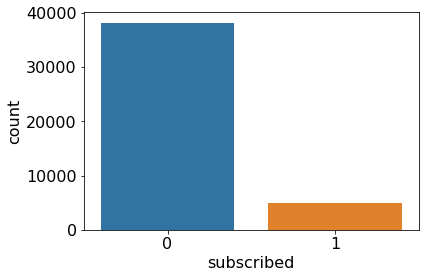

In [67]:
sns.countplot(x=df_model['subscribed'], data=df_ohe)

In [68]:
df_model.shape

(43190, 24)

In [69]:
df_model.to_csv('model.csv', index=False)

## Testing Models

In [70]:
import time

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, roc_auc_score

In [71]:
from time import time

aucs = []
names = []

def get_report(name, classifier, x_train, y_train, y_test, y_pred, y_train_pred):
    names.append(name)
    s_time = time()
    accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
    
    report = ''
    
    report += f'Report for {classifier}\n'
    
    report += f'{classifier} Confusion  matrix:\n'
    report += f'{confusion_matrix(y_test, y_pred)}\n\n'
    report += f'{classifier} accuracy mean: {accuracies.mean()}\n'
    report += f'{classifier} accuracy std dev: {accuracies.std()}\n'
    report += f'{classifier} preciosn score: {precision_score(y_test, y_pred)}\n'
    report += f'{classifier} recall score: {recall_score(y_test, y_pred)}\n'
    report += f'{classifier} f1 score: {f1_score(y_test, y_pred)}\n'
    auc = roc_auc_score(y_train, y_train_pred)
    report += f'{classifier} AUC train: {auc}\n'
    
    auc = roc_auc_score(y_test, y_pred)
    report += f'{classifier} AUC test: {auc}\n'
    

    aucs.append(auc)
    
    report += f'\nClassification report: \n{classification_report(y_test, y_pred)}'
    report += f'\nTime taken: {time() - s_time}\n'
    report += '*'*50
    
    return report

### Train-Test Split
We will split the datasets in **Train** and **Test**.
- 75% of the available data will be used for training
- Remaining 25% of the available data will be used for testing

In [72]:
x = df_model.drop('subscribed',axis = 1)
y = df_model['subscribed']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [73]:
#Oversampling the train data
from imblearn.over_sampling import RandomOverSampler

os=RandomOverSampler(1)
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
print("The number of classes before fit {}".format(len(y_train)))
print("The number of classes after fit {}".format(len(y_train_ns)))
x_train = x_train_ns
y_train = y_train_ns

The number of classes before fit 32392
The number of classes after fit 57294


In [74]:
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

### Executing Models
We will first run test the following models to see which models can provide us some promising results.
- Logistic Regression
- KNeighbors Classifier
- Gaussian Naive Bayes
- Decision-Tree Classifier
- Random-Forest Classifier
- Gradient Boosting Classifier
- AdaBoost Classifier

**Loigistic Regression**  
Logsitic regression uses a line (Sigmoid function) in the form of an "S" to predict if the dependent variable is true or false based on the independent variables. The "S-shaped" curve (on the line graph) will show the probability of the dependent variable occuring based on where the points of the independent variables lands on the curve. In this case, the output (y) is predicted by the numerical and categorical variables defined as "x" such as age, education and so on. Logistic regresssion is best used for classifying samples.

**K nearest neighbours (KNN)**  
K Nearest Neighbors looks at the k closest datapoints and probability sample that has positive labels. It is easy to implement, and you don't need an assumption for the data structure. KNN is also good for multivariate analysis.

**Naive Bayes**  
Naive Bayes assumes that all variables in the dataset are independent of each other. Meaning that there are no dependent variables or output. This algorithm uses Bayes rule which calculated the probability of an event related to previous knowledge of the variables concerning the event. This won't really work in this case since we have an output of the bank customers who will get a bank deposit. This process is better for tasks such as image processing.

**Decision Tree Classifier**  
Decision trees works through the data to decide if one action occurs, what will then be the result of a "yes" and a "no". It works each data making the decision of which path to take based on the answer. Because of this decision making process, this algorithm has no assumptions about the structure of the data, but instead decides on the path to take through each decision the algorithm performs.

**Random Forest**  
Random forest works like a decision tree algorithm but it performs various decision tree analysis on the dataset as a whole. That is, it is the bigger version of the decision tree; a forest is bigger than a tree, you can think of it that way. Random forest takes random samples of trees and it works faster than the decision tree algorithm.

**Gradient Boosting Classifier**  
Boosting is a technique that builds a new decision tree algorithm that focuses on the errors on the dataset to fix them. This learns the whole model in order to fix it and improve the prediction of the model. Aside from being related to decision trees, it also relates to gradient descent algorithm as the name signifies. Gradient boosting analyzes different parts of the dataset and builds trees that focuses and corrects those errors.

**AdaBoost Classifier**  
Ada-boost or Adaptive Boosting is one of ensemble boosting classifier proposed by Yoav Freund and Robert Schapire in 1996. It combines multiple classifiers to increase the accuracy of classifiers. AdaBoost is an iterative ensemble method. AdaBoost classifier builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy strong classifier. The basic concept behind Adaboost is to set the weights of classifiers and training the data sample in each iteration such that it ensures the accurate predictions of unusual observations. Any machine learning algorithm can be used as base classifier if it accepts weights on the training set. 

In [75]:
models = {'LR': LogisticRegression(), 'KNN': KNeighborsClassifier(n_neighbors = 5),
         'GaussNB': GaussianNB(), 'DTree': DecisionTreeClassifier(),
         'RFC': RandomForestClassifier(n_estimators = 10), 
        'GBC': GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3),
         'ABC': AdaBoostClassifier()}

log = ''

for name, classifier in models.items():
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    y_train_pred = classifier.predict(x_train)
    report = get_report(name, classifier, x_train, y_train, y_test, y_pred, y_train_pred)
    print(report)
    log += report
    log += '\n'

Report for LogisticRegression()
LogisticRegression() Confusion  matrix:
[[7537 1985]
 [ 280  996]]

LogisticRegression() accuracy mean: 0.7907635047431747
LogisticRegression() accuracy std dev: 0.004887834681444295
LogisticRegression() preciosn score: 0.33411606843341163
LogisticRegression() recall score: 0.780564263322884
LogisticRegression() f1 score: 0.4679351656095842
LogisticRegression() AUC train: 0.7862428875623976
LogisticRegression() AUC test: 0.7860498275236558

Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.79      0.87      9522
           1       0.33      0.78      0.47      1276

    accuracy                           0.79     10798
   macro avg       0.65      0.79      0.67     10798
weighted avg       0.89      0.79      0.82     10798

Time taken: 5.426929473876953
**************************************************
Report for KNeighborsClassifier()
KNeighborsClassifier() Confusion  matrix:
[[7681 1841]
 [

In [76]:
with open('logs\log_report.log', 'w') as writer:
        writer.write(log)

In [77]:
df_result = pd.DataFrame({'Classifier': names, 'Results': aucs})

In [78]:
df_result

,Classifier,Results
0,LR,0.786050
1,KNN,0.699959
2,GaussNB,0.732726
3,DTree,0.651820
4,RFC,0.665969
5,GBC,0.804623
6,ABC,0.803589


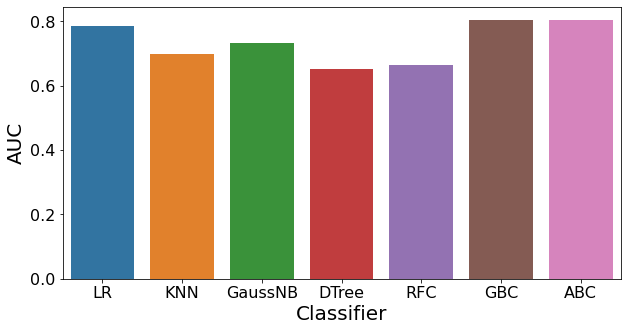

In [79]:
plt.subplots(figsize=(10,5)) 


ax = sns.barplot(x=df_result["Classifier"], y=df_result["Results"], data=df_result)

ax.set_xlabel('Classifier',fontsize = 20)
ax.set_ylabel('AUC', fontsize = 20)
plt.show()

### Top 3 Models
From the above results, We can choose our Top 3 models

In [80]:
df_result.sort_values('Results', ascending=False).head(3)

,Classifier,Results
5,GBC,0.804623
6,ABC,0.803589
0,LR,0.786050


In [81]:
base_results_dict =  df_result.set_index('Classifier')['Results'].to_dict()

## Hyperparameter Tuning  
In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters are learned.  
- We can use the Hyperparameter Tuning to obtain the set of best possible Hyperparamters for our learning models.  
- We will be using the technique called RandomizedSearchCV to obltain our best hyperparmeters.
- We will try to optimize our to three models.
 - LogisticRegression()
 - GradientBoostingClassifier()
 - AdaBoostClassifier()
- **Note:** The Optimization algorithm cannot be tested upto it's full potential due to hardware limitations.

In [82]:
opt_aucs = []
opt_names = []

def get_opt_report(name, classifier, x_train, y_train, y_test, y_pred):
    opt_names.append(name)
    s_time = time()
    accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
    
    report = ''
    
    report += f'Report for {classifier}\n'
    
    report += f'{name} Confusion  matrix:\n'
    report += f'{confusion_matrix(y_test, y_pred)}\n\n'
    report += f'{name} accuracy mean: {accuracies.mean()}\n'
    report += f'{name} accuracy std dev: {accuracies.std()}\n'
    report += f'{name} preciosn score: {precision_score(y_test, y_pred)}\n'
    report += f'{name} recall score: {recall_score(y_test, y_pred)}\n'
    report += f'{name} f1 score: {f1_score(y_test, y_pred)}\n'
    
    auc = roc_auc_score(y_test, y_pred)
    report += f'{name} Optimized AUC test: {auc}\n'
    

    opt_aucs.append(auc)
    
    report += f'\nClassification report: \n{classification_report(y_test, y_pred)}'
    report += f'\nTime taken: {time() - s_time}\n'
    report += '*'*50
    
    return report

In [83]:
from sklearn.model_selection import RandomizedSearchCV


def hypertuning_rscv(est, p_distr, nbr_iter):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=9)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(x_train, y_train)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

In [84]:
s_time = time()
est = LogisticRegression(n_jobs=-1)

lr_p_dist={'penalty': ['l1', 'l2', 'elasticnet', 'none']}

lr_parameters, lr_ht_score = hypertuning_rscv(est, lr_p_dist, 5)

lr_time = time() - s_time

# Print best parameters and score for LR

print(f"LR parameters: {lr_parameters}")
print(f"LR score: {lr_ht_score}")
print(f"Time taken: {lr_time}")

LR parameters: {'penalty': 'l2'}
LR score: 0.7898383774915348
Time taken: 13.340523958206177


In [85]:
# n_estimators = range(50,200,50)
# learning_rate = [0.001,0.01,0.1, 1.0]
# # maximum depth of the tree
# max_depth = range(1,5,1)

# #GBC
# s_time = time()
# est = GradientBoostingClassifier()

# gbc_p_dist={    
#                 'n_estimators':n_estimators,
#                'learning_rate': learning_rate,
#                'max_depth': max_depth,
#                'loss': ['deviance', 'exponential'],
#                'criterion': ['friedman_mse', 'mse']
#               }

# gbc_parameters, gbc_ht_score = hypertuning_rscv(est, gbc_p_dist, 3)

# gbc_time = time() - s_time

# # Print best parameters and score for GBC

# print(f"GBC parameters: {gbc_parameters}")
# print(f"GBC score: {gbc_ht_score}")
# print(f"Time taken: {gbc_time}")

In [86]:
# #ABC
# s_time = time()
# est = AdaBoostClassifier()


# abc_p_dist={    'n_estimators':n_estimators,
#                'learning_rate': [0.001,0.01,0.1, 1.0],
#                'algorithm': ['SAMME', 'SAMME.R']
#               }

# abc_parameters, abc_ht_score = hypertuning_rscv(est, abc_p_dist, 5)

# abc_time = time() - s_time

# # Print best parameters and score for ABC
# print(f"ABC parameters: {abc_parameters}")
# print(f"ABC score: {abc_ht_score}")
# print(f"Time taken: {abc_time}")

In [87]:
# hyperparameters = ''
# hyperparameters += f'LR parameters: {lr_parameters}\nLR score: {lr_ht_score}\nTime taken: {lr_time}\n\n'
# hyperparameters += f'GBC parameters: {gbc_parameters}\nLGBC score: {gbc_ht_score}\nTime taken: {abc_time}\n\n'
# hyperparameters += f'ABC parameters: {abc_parameters}\nABC score: {abc_ht_score}\nTime taken: {abc_time}'

In [88]:
opt_models = {'Optimized_LR': LogisticRegression(n_jobs=-1, penalty= 'l2'),
        'Optimized_GBC': GradientBoostingClassifier(n_estimators= 50,max_depth= 4,loss= 'exponential',learning_rate= 1,criterion= 'mse'),
              'Optimized_ABC': AdaBoostClassifier(n_estimators= 150, learning_rate= 1.0, algorithm= 'SAMME')}

log = ''

for name, classifier in opt_models.items():
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    report = get_opt_report(name, classifier, x_train, y_train, y_test, y_pred)
    print(report)
    log += report
    log += '\n'


Report for LogisticRegression(n_jobs=-1)
Optimized_LR Confusion  matrix:
[[7537 1985]
 [ 280  996]]

Optimized_LR accuracy mean: 0.7906238033921291
Optimized_LR accuracy std dev: 0.005046166227326167
Optimized_LR preciosn score: 0.33411606843341163
Optimized_LR recall score: 0.780564263322884
Optimized_LR f1 score: 0.4679351656095842
Optimized_LR Optimized AUC test: 0.7860498275236558

Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.79      0.87      9522
           1       0.33      0.78      0.47      1276

    accuracy                           0.79     10798
   macro avg       0.65      0.79      0.67     10798
weighted avg       0.89      0.79      0.82     10798

Time taken: 32.45295715332031
**************************************************
Report for GradientBoostingClassifier(criterion='mse', learning_rate=1, loss='exponential',
                           max_depth=4, n_estimators=50)
Optimized_GBC Confusion  matri

In [89]:
with open('opt_logs\opt_log_report.log', 'w') as writer:
        writer.write(log)

In [90]:
# with open('opt_logs\optimized_hyperparameter.log', 'w') as writer:
#         writer.write(hyperparameters)

In [91]:
df_opt_result = pd.DataFrame({'Classifier': opt_names, 'Results': opt_aucs})

In [92]:
df_opt_result.sort_values('Results', ascending = False)

,Classifier,Results
2,Optimized_ABC,0.801509
1,Optimized_GBC,0.793707
0,Optimized_LR,0.786050


In [93]:
opt_results_dict =  df_opt_result.set_index('Classifier')['Results'].to_dict()

In [94]:
df_opt_results = pd.DataFrame({'classifier':['LR','LR','GBC','GBC','ABC','ABC'],
                           'data_set':['baseline','optimized']*3,
                          'auc':[base_results_dict['LR'], opt_results_dict['Optimized_LR'],
                                 base_results_dict['GBC'] , opt_results_dict['Optimized_GBC'],
                                 base_results_dict['ABC'], opt_results_dict['Optimized_ABC']
                                ]
                          })

In [95]:
df_opt_results

,classifier,data_set,auc
0,LR,baseline,0.786050
1,LR,optimized,0.786050
2,GBC,baseline,0.804623
3,GBC,optimized,0.793707
4,ABC,baseline,0.803589
5,ABC,optimized,0.801509


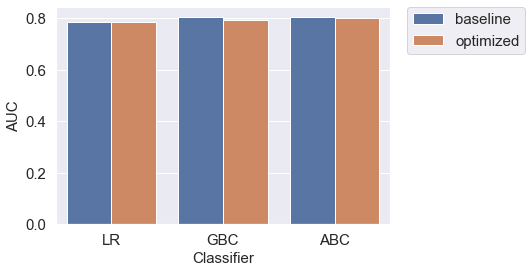

In [96]:
sns.set(style="darkgrid")

ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_opt_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

## Finalizing the Model
- Though all the top 3 Models are performing equally well. We will choose the **Optimzed AdaBoostClassifer** as our final model.
- **AdaBoostClassifer** is giving us an *accuracy mean, and an AUC of 0.81.*

### ROC Curve
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

- **True Positive Rate:** The true positive rate (TPR, also called sensitivity) is calculated as TP/TP+FN. TPR is the probability that an actual positive will test positive.
- **False Positive Rate:** The false positive rate is calculated as FP/FP+TN. TPR is the probability that an actual negative will test positive.

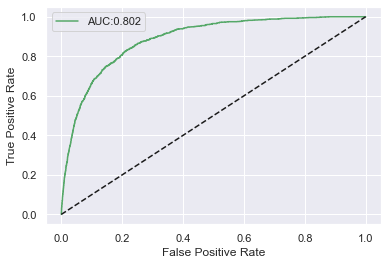

In [97]:
from sklearn.metrics import roc_curve 

false_pr_test, true_pr_test, thresholds_test = roc_curve(y_test, opt_models["Optimized_ABC"].predict_proba(x_test)[:,1])

auc_test = opt_aucs[2]

plt.plot(false_pr_test, true_pr_test, 'g-',label ='AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

- The AUC achieved by this model is 80%.
- It means the model gives us 30% better results over randomly guessing.

### Important Features
Let's have a look at the features important for our prediction and try to found how much importnat each of the available feature is.

In [98]:
model_columns = list(df_model.columns)[:-1]

feature_importances = pd.DataFrame(opt_models["Optimized_ABC"].feature_importances_, index = model_columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head()

,importance
duration,0.430689
pdays,0.156262
age,0.108200
poutcome,0.080040
housing,0.053371


In [99]:
feature_importances.index

Index(['duration', 'pdays', 'age', 'poutcome', 'housing', 'balance',
       'campaign', 'job_blue-collar', 'education', 'loan', 'job_student',
       'marital_married', 'job_entrepreneur', 'job_self-employed',
       'job_housemaid', 'job_services', 'job_admin.', 'job_management',
       'job_retired', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_single'],
      dtype='object')

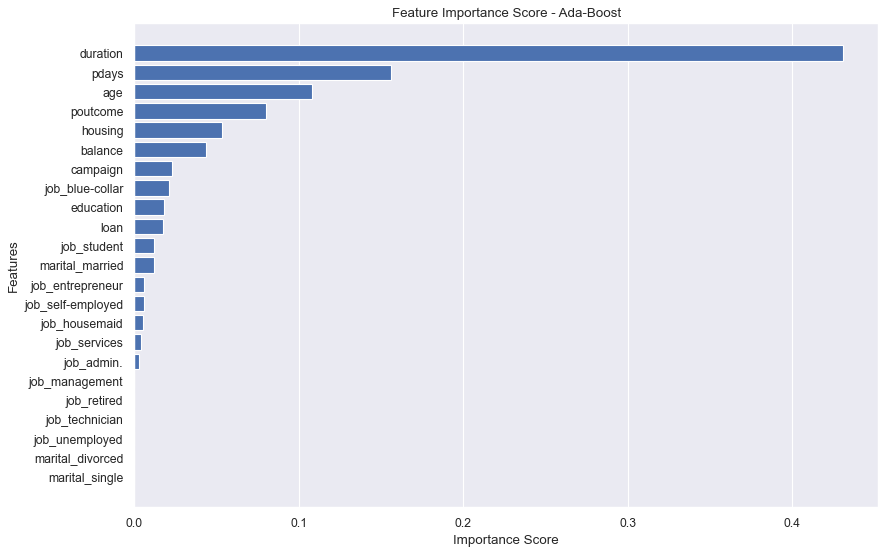

In [100]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.barh(feature_importances.index[::-1], feature_importances["importance"][::-1], align="center")
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Ada-Boost')
plt.grid(axis = 'y')
plt.show()

# The graph below will show the contribution of each featuure in the final prediction

In [101]:
important_features = list(feature_importances.index)[:2]
important_features

['duration', 'pdays']

### Let's try to describe our Subscribing customers on the basis of important features

In [102]:
df_sub = df_model[df_model['subscribed']==1][important_features]
df_sub.describe()

,duration,pdays
count,5021.000000,5021.000000
mean,497.851042,69.134435
std,323.040606,118.621814
min,8.000000,0.000000
25%,243.000000,0.000000
50%,407.000000,0.000000
75%,694.000000,98.000000
max,1500.000000,854.000000


### Let's try to describe our Non-Subscribing customers on the basis of important features

In [103]:
df_no_sub = df_model[df_model['subscribed']==0][important_features]
df_no_sub.describe()

,duration,pdays
count,38169.000000,38169.000000
mean,217.186601,37.552202
std,186.895084,96.791154
min,1.000000,0.000000
25%,96.000000,0.000000
50%,164.000000,0.000000
75%,277.000000,0.000000
max,1495.000000,871.000000


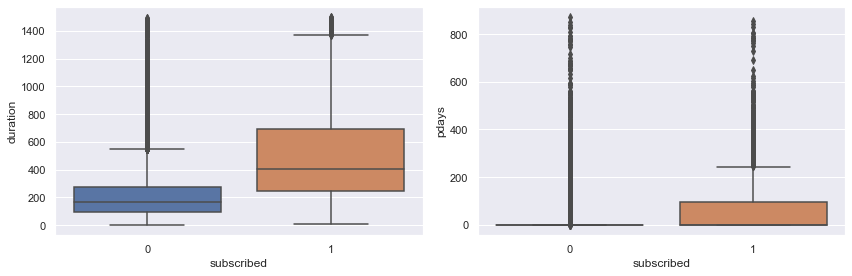

In [104]:
for feature_index in range(0, len(important_features), 2):
    plt.figure(figsize=(12,4))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x='subscribed', y=important_features[feature_index], data=df_model)
    
    feature_index += 1
    plt.subplot(1, 2, 2)
    sns.boxplot(x='subscribed', y=important_features[feature_index], data=df_model)
    
    plt.tight_layout()
    plt.show()

### Deployment of the selected model
- We can now use the pickle module to save our model in a pickle file.
- We can then use the pickle file for the deployment of our model with flask.
- The final deployed project will be a flask web application.

## Conclusion
- We have created a machine learning model that is able to predict how likely clients will subscribe to a bank term deposit. The best model was AdaBoost Classifier. The model's performance accuracy is 81%.
- We should focus on targeting customers with higher call duration as they are high importance features for the model and business.
- For the 'duration' feature the value of first quartile is 243 we should focus on the customers with whom we are having  communications this long.  
- Instead of reaching out to more customers on a certain date of the month the campaigners
- Though We can't see any clear cut representation of subscribers having a specific range of account balance, still we should focus more on the customers having an account balance of more than 203 Euros as it is the first quartile values for  the same.
- Therefore, we save time and money knowing the characteristics of clients we should market to and that will lead to increased growth and revenue.
- We have executed and tested all the models multiple times meanwhile logging each test run in different log files.
- The log files can be used as a reference when trying to modify/revise the current model in future.
